<a href="https://colab.research.google.com/github/braiso-22/Neuronal_Networks_Convolution/blob/main/mnist_convolucional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

val_images = train_images[:6000]
val_labels = train_labels[:6000]

train_images = train_images[6000:]
train_labels = train_labels[6000:]


print (train_images.shape)

train_images = train_images.reshape((60000-6000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

val_images = val_images.reshape((6000, 28, 28, 1))
val_images = val_images.astype('float32') / 255


train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
val_labels = to_categorical(val_labels)


11490434/11490434 [==============================] - 0s 0us/step
(54000, 28, 28)


In [ ]:
import keras
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 10)                1

In [ ]:
batch_size = 100
epochs = 10

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(val_images, val_labels),
          verbose=1
          )

Epoch 1/10
540/540 [==============================] - 5s 8ms/step - loss: 0.0294 - accuracy: 0.9913 - val_loss: 0.0479 - val_accuracy: 0.9863
Epoch 2/10
540/540 [==============================] - 3s 6ms/step - loss: 0.0288 - accuracy: 0.9915 - val_loss: 0.0467 - val_accuracy: 0.9882
Epoch 3/10
540/540 [==============================] - 3s 5ms/step - loss: 0.0281 - accuracy: 0.9916 - val_loss: 0.0508 - val_accuracy: 0.9867
Epoch 4/10
540/540 [==============================] - 3s 6ms/step - loss: 0.0277 - accuracy: 0.9923 - val_loss: 0.0478 - val_accuracy: 0.9872
Epoch 5/10
540/540 [==============================] - 4s 7ms/step - loss: 0.0273 - accuracy: 0.9922 - val_loss: 0.0482 - val_accuracy: 0.9865
Epoch 6/10
540/540 [==============================] - 3s 6ms/step - loss: 0.0271 - accuracy: 0.9920 - val_loss: 0.0497 - val_accuracy: 0.9867
Epoch 7/10
540/540 [==============================] - 3s 6ms/step - loss: 0.0262 - accuracy: 0.9924 - val_loss: 0.0468 - val_accuracy: 0.9877
Epoch 

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0351 - accuracy: 0.9895
Test loss: 0.03514988720417023
Test accuracy: 0.9894999861717224


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


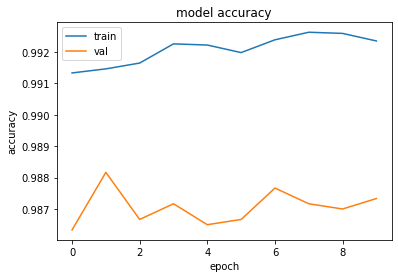

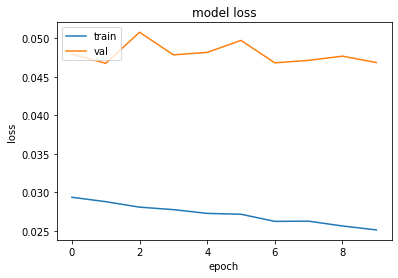

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()